In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pyCloudy as pc
import pyneb as pn
from astropy import units as u
import os
import pandas as pd
from astropy import constants as const

x=np.arange(4000,7000,0.001)
t_x = np.arange(4000,7000,1)

total_f_ratio = 5.15
ratio_6560 = 6560.47 / 1025.27

def R_Flux(F0,lam,lam_i,del_lam_i, ratio , flux_L , eff , Fc):
    ff = (lam-lam_i)/(ratio*del_lam_i) 
    fl = F0*np.exp(-ff**2/2) 
    return ((fl) / ratio**2) * (eff * flux_L) + Fc

def Flux(F0,lam,lam_i,del_lam_i,Fc):
    ff = (lam-lam_i)/(del_lam_i) 
    fl = F0*np.exp(-ff**2 / 2) + Fc
    return fl

def Data_R_Flux(F0,lam,lam_i,del_lam_i,Fc):
    ff = (lam-lam_i)/(del_lam_i) 
    fl = F0*np.exp(-ff**2 / 2) + Fc
    return fl

def total_flux(f,x ,fc):
    ft = 0
    dx = x[1]- x[0]
    for ii, flux in enumerate(f) :
        ft += (flux-fc)*dx #*x[ii] 
    return ft

def test_flux(f,x):
    flux = f*x *np.sqrt(2*np.pi)
    return flux

In [2]:
NGC6741_p = r"/home/jin/cloudy_Test/PNe.tar-20240415T105820Z-001/PNe/PNe/ngc6741/cngc6741_3600s.0055.txt"
NGC6884_p = r"/home/jin/cloudy_Test/PNe.tar-20240415T105820Z-001/PNe/PNe/ngc6884/cngc6884_3600s.0055.txt"
NGC6886_p = r"/home/jin/cloudy_Test/PNe.tar-20240415T105820Z-001/PNe/PNe/ngc6886/ngc6886_2400s.0051.txt"
NGC6881_p = r"/home/jin/cloudy_Test/PNe.tar-20240415T105820Z-001/PNe/PNe/ngc6881/cngc6881_3300s.0054.txt"
H4_1_p = r"/home/jin/cloudy_Test/PNe.tar-20240415T105820Z-001/PNe/PNe/H_4_1.txt"
Hen2_447_p = r"/home/jin/cloudy_Test/PNe.tar-20240415T105820Z-001/PNe/PNe/Hen_2_447.txt"
Hu2_1_p = r"/home/jin/cloudy_Test/PNe.tar-20240415T105820Z-001/PNe/PNe/Hu_2_1.txt"
J900_p = r"/home/jin/cloudy_Test/PNe.tar-20240415T105820Z-001/PNe/PNe/J_900.txt"
M1_8_p = r"/home/jin/cloudy_Test/PNe.tar-20240415T105820Z-001/PNe/PNe/M_1_8.txt"
NGC2346_p = r"/home/jin/cloudy_Test/PNe.tar-20240415T105820Z-001/PNe/PNe/NGC_2346.txt"
NGC2392_p = r"/home/jin/cloudy_Test/PNe.tar-20240415T105820Z-001/PNe/PNe/NGC_2392.txt"
NGC3242_p = r"/home/jin/cloudy_Test/PNe.tar-20240415T105820Z-001/PNe/PNe/NGC_3242.txt"

direct = r"/home/jin/cloudy_Test/parameters"

cc = const.c.to(u.km/u.s).value
def FWHM_to_sig (FWHM_v,lam_c):
    sig_lam = (FWHM_v/ cc)*(lam_c/(2*np.sqrt(2*np.log(2))))
    return sig_lam
                

files = os.listdir(direct)

txt_files = [file for file in files if file.endswith('result.txt')]
txt_files_parameter = [file for file in files if file.endswith('params.txt')]

parameters_names = []
for file in txt_files:

    parts = file.split('_')

    if len(parts) > 1 and parts[1] == 's':
        parameters_name = parts[0] + parts[1]
    else:
        parameters_name = parts[0]
    
    parameters_names.append(parameters_name)

print(parameters_names)

['Hen2-447', 'NGC6886s', 'NGC2346', 'NGC6886', 'NGC6881', 'M1-8', 'NGC2392', 'Hu2-1s', 'H4-1', 'Hu2-1', 'NGC2392s', 'NGC6884', 'NGC3242', 'J900', 'J900s', 'NGC6741', 'NGC3242s']


In [3]:
for ii , name in enumerate(parameters_names):
    direct_r = direct + '/' + txt_files[ii]
    direct_p = direct + '/' + txt_files_parameter[ii]
    name_w = name.replace('-', '_')
    
    globals()[f'paramter_{name_w}']= pd.read_csv(direct_r,sep='\,',header=0,engine='python')
    globals()[f're_para{name_w}']= pd.read_csv(direct_p,sep='\,',header=0,engine='python')


    globals()[f'Model_lam_{name_w}'] = globals()[f'paramter_{name_w}']['Wavelength'].to_numpy()
    globals()[f'Model_flux_{name_w}'] = globals()[f'paramter_{name_w}']['Flux'].to_numpy()

    globals()[f'F_c_{name_w}'] = globals()[f'paramter_{name_w}']['Continuum_Model'].to_numpy()

    globals()[f'F_6527_{name_w}'] = globals()[f'paramter_{name_w}']['HeII_6527_Model'].to_numpy()
    globals()[f'F_6545_{name_w}'] = globals()[f'paramter_{name_w}']['Raman_HeII_6545_Model'].to_numpy()   

    globals()[f'F_6560_{name_w}'] = globals()[f'paramter_{name_w}']['He_6560_Model'].to_numpy()
    globals()[f'F_6563_{name_w}'] = globals()[f'paramter_{name_w}']['Ha_6563_Model'].to_numpy()
    globals()[f'F_6548_1_{name_w}'] = globals()[f'paramter_{name_w}']['NII_6548_1_Model'].to_numpy()
    globals()[f'F_6548_2_{name_w}'] = globals()[f'paramter_{name_w}']['NII_6548_2_Model'].to_numpy()

    globals()[f'F_6584_1_{name_w}'] = globals()[f'paramter_{name_w}']['NII_6584_1_Model'].to_numpy()
    globals()[f'F_6584_2_{name_w}'] = globals()[f'paramter_{name_w}']['NII_6584_2_Model'].to_numpy()

    globals()[f'F_6527_sig_{name_w}'] = globals()[f're_para{name_w}'][' Sigma'].to_numpy()[0]
    globals()[f'F_6545_sig_{name_w}'] =  globals()[f're_para{name_w}'][' Sigma'].to_numpy()[1]   

    globals()[f'F_6560_sig_{name_w}'] =  globals()[f're_para{name_w}'][' Sigma'].to_numpy()[2]
    globals()[f'F_6563_sig_{name_w}'] =  globals()[f're_para{name_w}'][' Sigma'].to_numpy()[3]
    globals()[f'F_6548_1_sig_{name_w}'] =  globals()[f're_para{name_w}'][' Sigma'].to_numpy()[4]
    globals()[f'F_6548_2_sig_{name_w}'] = globals()[f're_para{name_w}'][' Sigma'].to_numpy()[5]

    globals()[f'F_6584_1_sig_{name_w}'] = globals()[f're_para{name_w}'][' Sigma'].to_numpy()[6]
    globals()[f'F_6584_2_sig_{name_w}'] =  globals()[f're_para{name_w}'][' Sigma'].to_numpy()[7]


    
    globals()[f'F_6527_lam_{name_w}'] = globals()[f're_para{name_w}'][' Center'].to_numpy()[0]
    globals()[f'F_6545_lam_{name_w}'] =  globals()[f're_para{name_w}'][' Center'].to_numpy()[1]  

    globals()[f'F_6560_lam_{name_w}'] =  globals()[f're_para{name_w}'][' Center'].to_numpy()[2]
    globals()[f'F_6563_lam_{name_w}'] =  globals()[f're_para{name_w}'][' Center'].to_numpy()[3]
    globals()[f'F_6548_1_lam_{name_w}'] =  globals()[f're_para{name_w}'][' Center'].to_numpy()[4]
    globals()[f'F_6548_2_lam_{name_w}'] = globals()[f're_para{name_w}'][' Center'].to_numpy()[5]

    globals()[f'F_6584_1_lam_{name_w}'] = globals()[f're_para{name_w}'][' Center'].to_numpy()[6]
    globals()[f'F_6584_2_lam_{name_w}'] =  globals()[f're_para{name_w}'][' Sigma'].to_numpy()[7]


Condition 1 RCE of ratio is  0.36907965078236377
Condition 4 RCE of ratio is  0.38964569900969676


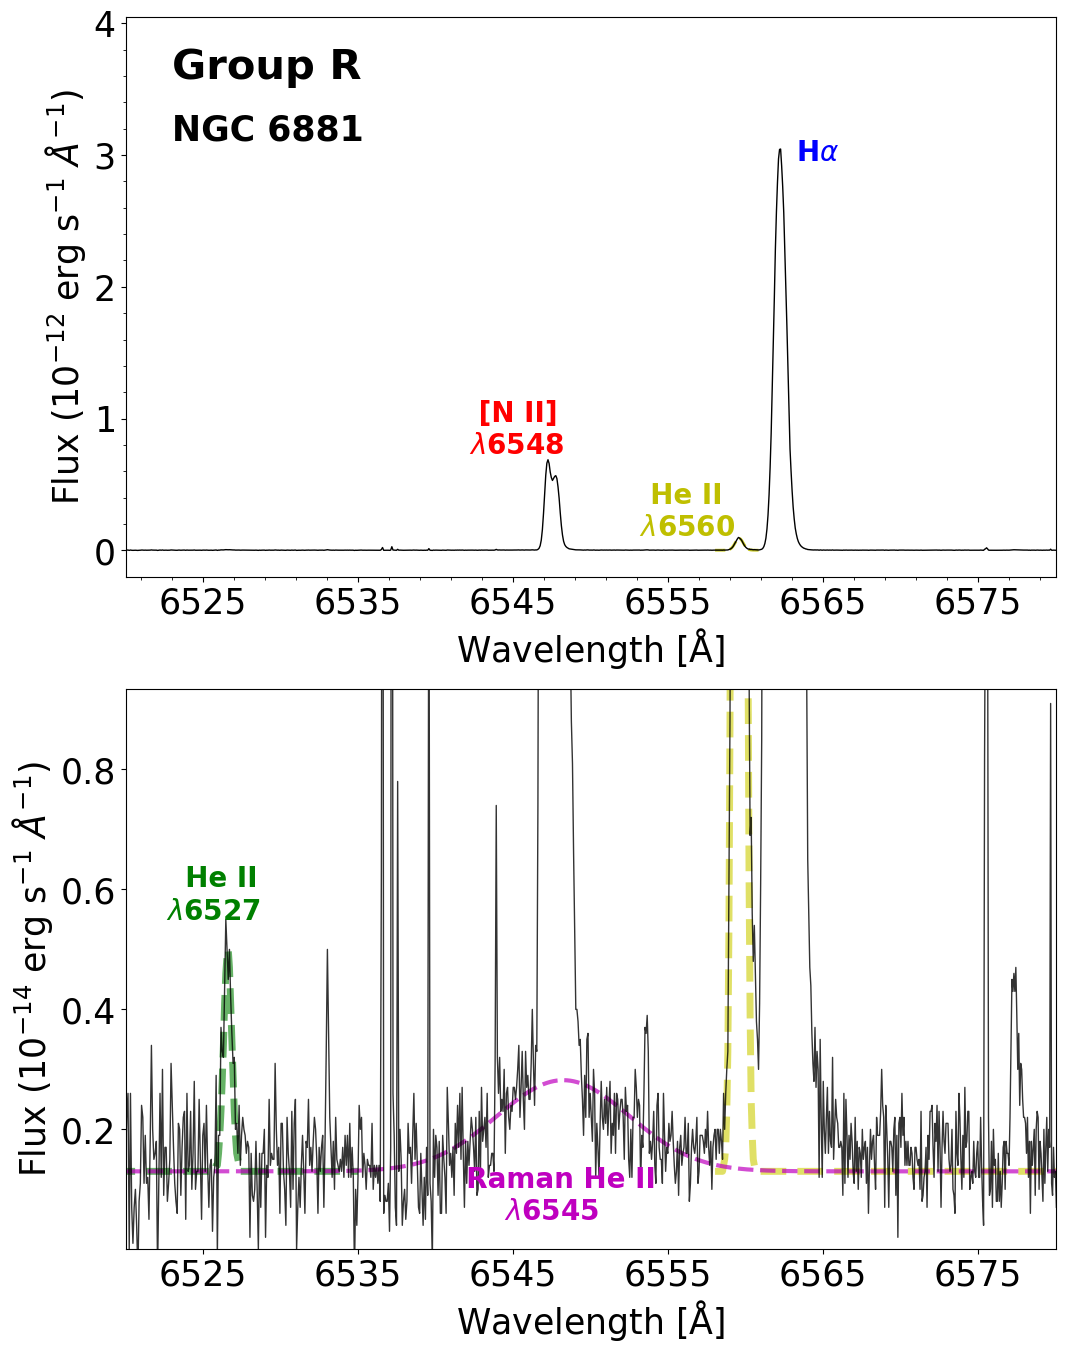

In [4]:
fig = plt.figure(1,figsize=(12,16))


plt.subplot(211)
name = 'NGC6881'
globals()[f'Model_lam_{name}'] = globals()[f'paramter_{name}']['Wavelength']
globals()[f'Model_flux_{name}'] = globals()[f'paramter_{name}']['Flux']

globals()[f'F_c_{name}'] = globals()[f'paramter_{name}']['Continuum_Model']

globals()[f'F_6527_{name}'] = globals()[f'paramter_{name}']['HeII_6527_Model']+ globals()[f'F_c_{name}']
globals()[f'F_6545_{name}'] = globals()[f'paramter_{name}']['Raman_HeII_6545_Model']  +globals()[f'F_c_{name}']

globals()[f'F_6560_{name}'] = globals()[f'paramter_{name}']['He_6560_Model']+globals()[f'F_c_{name}']
globals()[f'F_6563_{name}'] = globals()[f'paramter_{name}']['Ha_6563_Model'] + globals()[f'F_c_{name}']
globals()[f'F_6548_1_{name}'] = globals()[f'paramter_{name}']['NII_6548_1_Model'] +globals()[f'F_c_{name}']
globals()[f'F_6548_2_{name}'] = globals()[f'paramter_{name}']['NII_6548_2_Model'] +globals()[f'F_c_{name}']
globals()[f'F_6584_1_{name}'] = globals()[f'paramter_{name}']['NII_6584_1_Model'] +globals()[f'F_c_{name}']
globals()[f'F_6584_2_{name}'] = globals()[f'paramter_{name}']['NII_6584_2_Model'] +globals()[f'F_c_{name}']

normal = 1

# x_6527 = np.where(globals()[f'Model_lam_{name}'] <= 6535)[0]
# plt.plot(globals()[f'Model_lam_{name}'][x_6527],globals()[f'F_6527_{name}'][x_6527]/normal,'g--',alpha=0.4,lw=2)

x_6560 = np.where((globals()[f'Model_lam_{name}'] >= 6558)&(globals()[f'Model_lam_{name}'] <= 6561))[0]
plt.plot(globals()[f'Model_lam_{name}'][x_6560 ],globals()[f'F_6560_{name}'][x_6560 ]/normal,'y--',alpha=0.9,lw=2)

F_6560 = 8.99E-14
lam_6560 = 6559.58
FWHM_6560 = 24.74490655
F_6560_sig = FWHM_to_sig(FWHM_6560,lam_6560)

F_6545_con_1 =1.31E-15 *1e12
F_6545_con_4 = 1.52E-15 *1e12

lam_6545_con_1 = 6548.45
lam_6545_con_4 =6548.23

FWHM_6545_con_1 = 506.3025878
FWHM_6545_con_4 = 460.6830477


F_6545_con_1_sigma = FWHM_to_sig(FWHM_6545_con_1,lam_6545_con_1)
F_6545_con_4_sigma = FWHM_to_sig(FWHM_6545_con_4,lam_6545_con_4)

fit_6545_con_1 = Data_R_Flux(F_6545_con_1,globals()[f'Model_lam_{name}'],lam_6545_con_1,F_6545_con_1_sigma, globals()[f'F_c_{name}'])
fit_6545_con_4 = Data_R_Flux(F_6545_con_4,globals()[f'Model_lam_{name}'],lam_6545_con_4,F_6545_con_4_sigma, globals()[f'F_c_{name}'])

# x_6545= np.where((globals()[f'Model_lam_{name}'] <= 6558)&(globals()[f'Model_lam_{name}'] >= 6535))[0]
# plt.plot(globals()[f'Model_lam_{name}'],fit_6545_con_4,'m--',alpha=0.6,lw=3)

plt.plot(globals()[f'Model_lam_{name}'],globals()[f'Model_flux_{name}']/normal,'k-',alpha=1,lw=1)

x_p = np.argmax(globals()[f'F_6560_{name}'])
y_label = globals()[f'F_6560_{name}'].max()/normal
x_label = globals()[f'Model_lam_{name}'][x_p]
plt.text(x_label-7,y_label*(1.2),'  He II \n $\lambda$6560 ',size=20,fontweight='bold',color='y',alpha=1)

x_p = np.argmax(globals()[f'F_6563_{name}'])
y_label = globals()[f'F_6563_{name}'].max()/normal
x_label = globals()[f'Model_lam_{name}'][x_p]
plt.text(x_label + 1,y_label*(0.95),r'H$\alpha$',size=20,fontweight='bold',color='b')

x_p = np.argmax(globals()[f'F_6548_1_{name}'])
y_label = globals()[f'F_6548_1_{name}'].max()/normal
x_label = globals()[f'Model_lam_{name}'][x_p]
plt.text(x_label-5,y_label*(1.15),' [N II]\n$\lambda$6548',size=20,fontweight='bold',color='r')

# x_p = np.argmax(globals()[f'F_6584_1_{name}'])
# y_label = globals()[f'F_6584_1_{name}'].max()/normal
# x_label = globals()[f'Model_lam_{name}'][x_p]
# plt.text(x_label-8,y_label*(0.95),' [N II]\n$\lambda$6584',size=17,fontweight='bold',color='r')



lam_0_6527= 6527.1
lam_0_6545 = 6544.7
del_lam = (lam_0_6545 - lam_0_6527 )
# plt.ylabel(fontsize=20)
plt.xlabel(r'Wavelength $[\rm \AA]$',fontsize=25)
plt.ylabel(r'Flux $(10^{-12}$ erg s$^{-1}$ $ \AA^{-1}$)',fontsize=25)
x_min,x_max = 6520,6580
plt.xlim(x_min,x_max)
plt.ylim(-0.2,globals()[f'F_6563_{name}'].max()*1.3)
plt.xticks(np.arange(6525,6585,10),fontsize=25)
plt.yticks(fontsize=20)
plt.yticks([0,1,2,3,4],fontsize=25)
plt.minorticks_on()
plt.text(x_min+3,globals()[f'F_6563_{name}'].max()*1.15,'Group R',size=30,fontweight='bold')
plt.text(x_min+3,globals()[f'F_6563_{name}'].max()*1.0,'NGC 6881',size=25,fontweight='bold')


plt.subplot(212)

factor = 100
globals()[f'Model_lam_{name}'] = globals()[f'paramter_{name}']['Wavelength']
globals()[f'Model_flux_{name}'] = globals()[f'paramter_{name}']['Flux']*factor

globals()[f'F_c_{name}'] = globals()[f'paramter_{name}']['Continuum_Model']*factor

globals()[f'F_6527_{name}'] = globals()[f'paramter_{name}']['HeII_6527_Model']*factor+ globals()[f'F_c_{name}']
globals()[f'F_6545_{name}'] = globals()[f'paramter_{name}']['Raman_HeII_6545_Model']*factor  +globals()[f'F_c_{name}']

globals()[f'F_6560_{name}'] = globals()[f'paramter_{name}']['He_6560_Model']*factor+globals()[f'F_c_{name}']
globals()[f'F_6563_{name}'] = globals()[f'paramter_{name}']['Ha_6563_Model']*factor+ globals()[f'F_c_{name}']
globals()[f'F_6548_1_{name}'] = globals()[f'paramter_{name}']['NII_6548_1_Model']*factor+ globals()[f'F_c_{name}']
globals()[f'F_6548_2_{name}'] = globals()[f'paramter_{name}']['NII_6548_2_Model']*factor + globals()[f'F_c_{name}']
globals()[f'F_6584_1_{name}'] = globals()[f'paramter_{name}']['NII_6584_1_Model']*factor+ globals()[f'F_c_{name}']
globals()[f'F_6584_2_{name}'] = globals()[f'paramter_{name}']['NII_6584_2_Model']*factor+ globals()[f'F_c_{name}']


x_6527 = np.where(globals()[f'Model_lam_{name}'] <= 6535)[0]
plt.plot(globals()[f'Model_lam_{name}'][x_6527],globals()[f'F_6527_{name}'][x_6527]/normal,'g--',alpha=0.6,lw=5)

x_6560 = np.where((globals()[f'Model_lam_{name}'] >= 6558))[0]
plt.plot(globals()[f'Model_lam_{name}'][x_6560 ],globals()[f'F_6560_{name}'][x_6560 ]/normal,color='#CCCC00',linestyle='--',alpha=0.6,lw=5)


plt.plot(globals()[f'Model_lam_{name}'],fit_6545_con_4*factor,'m--',alpha=0.7,lw=3)


plt.plot(globals()[f'Model_lam_{name}'],globals()[f'Model_flux_{name}']/normal,'k-',alpha=0.8,lw=1)


x_p = np.argmax(globals()[f'F_6527_{name}'])
y_label = globals()[f'F_6527_{name}'].max() /normal
x_label = globals()[f'Model_lam_{name}'][x_p]
plt.text(x_label-4,y_label*(1.1),'  He II \n$\lambda$6527',size=20,fontweight='bold',color='g')

x_p = np.argmax(globals()[f'F_6545_{name}'])
y_label = globals()[f'F_c_{name}'].mean() /normal
x_label = globals()[f'Model_lam_{name}'][x_p]
plt.text(x_label-6.5,y_label*(0.4),'  Raman He II \n      $\lambda$6545',size=20,fontweight='bold',color='m')



# Noise_level =globals()[f'F_c_{name}'] + (1.79e-15 * 1e12 *factor ) # 3sigma
# plt.plot(globals()[f'Model_lam_{name}'],Noise_level,'k--' )


x_min,x_max = 6520,6580
plt.xlim(x_min,x_max)
plt.xticks(np.arange(6525,6585,10),fontsize=25)
y_max = globals()[f'F_6527_{name}'].max()/normal

plt.xlabel(r'Wavelength $[\rm \AA]$',fontsize=25)
plt.ylabel(r'Flux $(10^{-14}$ erg s$^{-1}$ $ \AA^{-1})$',fontsize=25)
plt.ylim(1e-3,3*globals()[f'F_6563_{name}'].max()/1000)
plt.yticks(fontsize=25)



RCE_1 = 1.24 * (F_6545_con_1_sigma*F_6545_con_1/1e12) / (F_6560*F_6560_sig )


print('Condition 1 RCE of ratio is ',RCE_1)

RCE_4 = 1.24 * (F_6545_con_4_sigma*F_6545_con_4/1e12) / (F_6560*F_6560_sig )


print('Condition 4 RCE of ratio is ',RCE_4)
# f_R_1 =R_Flux(globals()[f'F_6560_{name}'].max(),x_flux,globals()[f'F_6545_lam_{name}'],globals()[f'F_6560_sig_{name}'],ratio_6560,total_f_ratio ,RCE,fc)
# plt.plot(x_flux,f_R_1,'r--')

# plt.savefig(f'/mnt/c/Users/wlsdl/OneDrive/바탕 화면/Re_BOES_{name}_R_H',bbox_inches='tight')

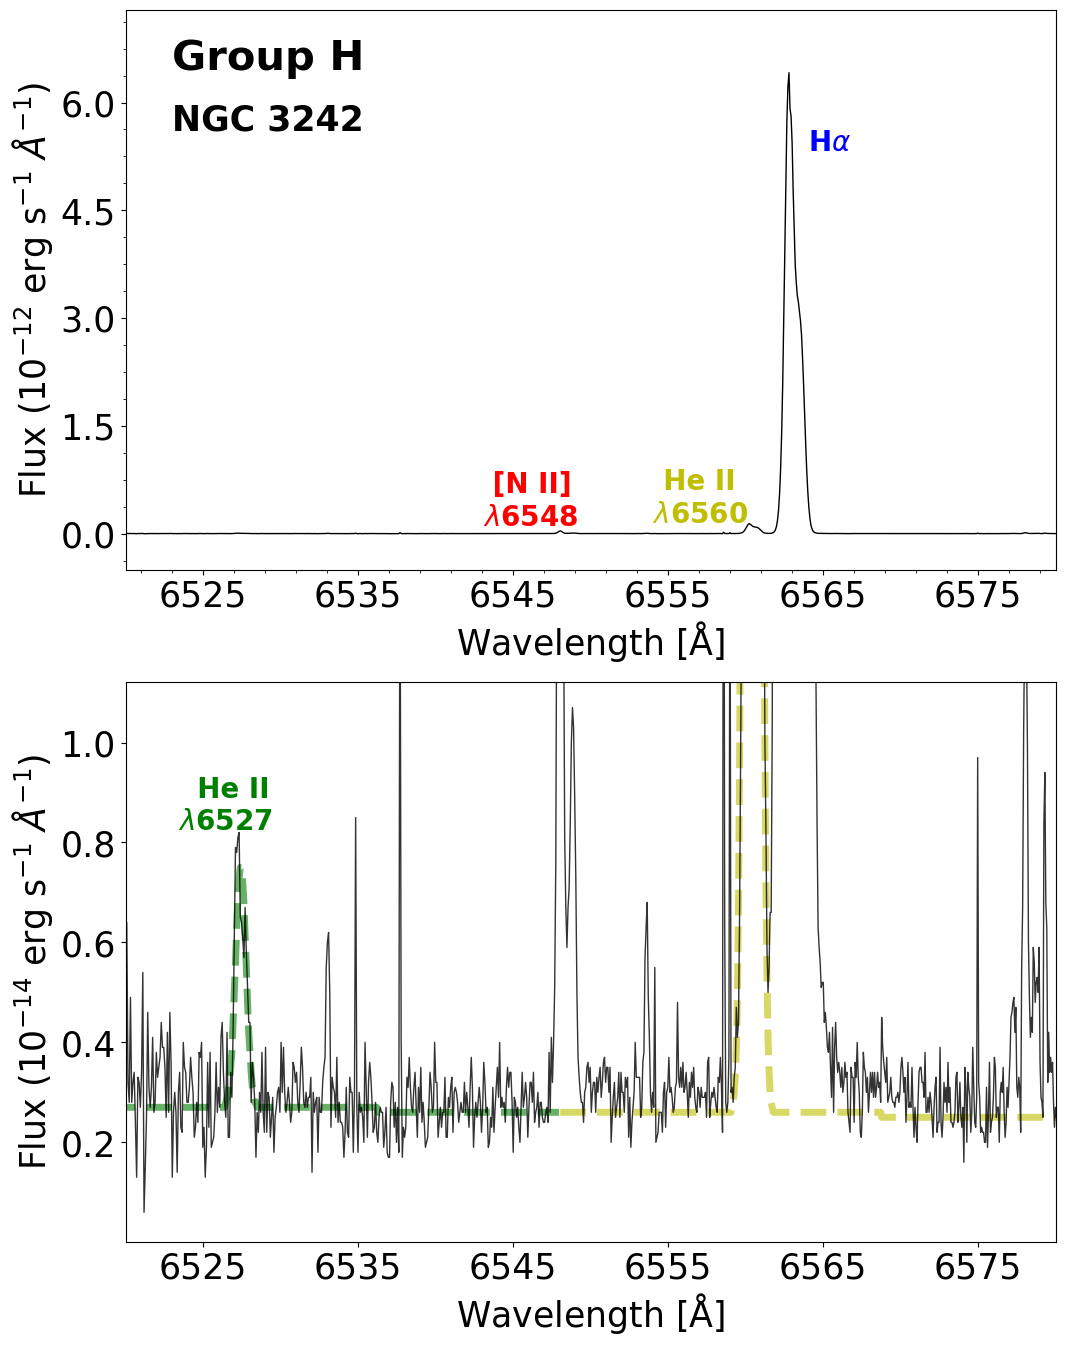

In [5]:
fig = plt.figure(1,figsize=(12,16))


plt.subplot(211)
name = 'NGC3242'
globals()[f'Model_lam_{name}'] = globals()[f'paramter_{name}']['Wavelength']
globals()[f'Model_flux_{name}'] = globals()[f'paramter_{name}']['Flux']

globals()[f'F_c_{name}'] = globals()[f'paramter_{name}']['Continuum_Model']

globals()[f'F_6527_{name}'] = globals()[f'paramter_{name}']['HeII_6527_Model']+ globals()[f'F_c_{name}']
globals()[f'F_6545_{name}'] = globals()[f'paramter_{name}']['Raman_HeII_6545_Model']  +globals()[f'F_c_{name}']

globals()[f'F_6560_{name}'] = globals()[f'paramter_{name}']['He_6560_Model']+globals()[f'F_c_{name}']
globals()[f'F_6563_{name}'] = globals()[f'paramter_{name}']['Ha_6563_Model'] + globals()[f'F_c_{name}']
globals()[f'F_6548_1_{name}'] = globals()[f'paramter_{name}']['NII_6548_1_Model'] + globals()[f'F_c_{name}']
globals()[f'F_6548_2_{name}'] = globals()[f'paramter_{name}']['NII_6548_2_Model'] + globals()[f'F_c_{name}']
globals()[f'F_6584_1_{name}'] = globals()[f'paramter_{name}']['NII_6584_1_Model'] + globals()[f'F_c_{name}']
globals()[f'F_6584_2_{name}'] = globals()[f'paramter_{name}']['NII_6584_2_Model'] + globals()[f'F_c_{name}']

normal = 1

# x_6527 = np.where(globals()[f'Model_lam_{name}'] <= 6535)[0]
# plt.plot(globals()[f'Model_lam_{name}'][x_6527],globals()[f'F_6527_{name}'][x_6527]/normal,'g--',alpha=0.8,lw=2)

# x_6560 = np.where((globals()[f'Model_lam_{name}'] >= 6560)&(globals()[f'Model_lam_{name}'] <= 6562.3))[0]
# plt.plot(globals()[f'Model_lam_{name}'][x_6560 ],globals()[f'F_6560_{name}'][x_6560 ]/normal,'y--',alpha=0.8,lw=2)



plt.plot(globals()[f'Model_lam_{name}'],globals()[f'Model_flux_{name}']/normal,'k-',alpha=1,lw=1)


x_p = np.argmax(globals()[f'F_6560_{name}'])
y_label = globals()[f'F_6560_{name}'].max()/normal
x_label = globals()[f'Model_lam_{name}'][x_p]
plt.text(x_label-7,y_label*(1.2),'  He II \n $\lambda$6560 ',size=20,fontweight='bold',color='y',alpha=1)

x_p = np.argmax(globals()[f'F_6563_{name}'])
y_label = globals()[f'F_6563_{name}'].max()/normal
x_label = globals()[f'Model_lam_{name}'][x_p]
plt.text(x_label + 1,y_label*(0.95),r'H$\alpha$',size=20,fontweight='bold',color='b')

x_p = np.argmax(globals()[f'F_6548_1_{name}'])
y_label = globals()[f'F_6548_1_{name}'].max()/normal
x_label = globals()[f'Model_lam_{name}'][x_p]
plt.text(x_label-5,y_label*(3),' [N II]\n$\lambda$6548',size=20,fontweight='bold',color='r')


lam_0_6527= 6527.1
lam_0_6545 = 6544.7
del_lam = (lam_0_6545 - lam_0_6527 )
# plt.ylabel(fontsize=20)
plt.xlabel(r'Wavelength $[\rm \AA]$',fontsize=25)
plt.ylabel(r'Flux $(10^{-12}$ erg s$^{-1}$ $ \AA^{-1})$',fontsize=25)
x_min,x_max = 6520,6580
plt.xlim(x_min,x_max)
plt.ylim(-0.5,globals()[f'F_6563_{name}'].max()*1.3)
plt.xticks(np.arange(6525,6585,10),fontsize=25)
# plt.yticks(fontsize=20)
plt.yticks([0.0,1.5,3.0,4.5,6.0],fontsize=25)
plt.minorticks_on()
# plt.text(x_min+3,globals()[f'F_6563_{name}'].max()*1.15,'NGC 3242',size=35,fontweight='bold')
plt.text(x_min+3,globals()[f'F_6563_{name}'].max()*1.15,'Group R',size=30,fontweight='bold')
plt.text(x_min+3,globals()[f'F_6563_{name}'].max()*1.0,'NGC 6881',size=25,fontweight='bold')


plt.subplot(212)

factor = 100
globals()[f'Model_lam_{name}'] = globals()[f'paramter_{name}']['Wavelength']
globals()[f'Model_flux_{name}'] = globals()[f'paramter_{name}']['Flux']*factor

globals()[f'F_c_{name}'] = globals()[f'paramter_{name}']['Continuum_Model']*factor

globals()[f'F_6527_{name}'] = globals()[f'paramter_{name}']['HeII_6527_Model']*factor+ globals()[f'F_c_{name}']
globals()[f'F_6545_{name}'] = globals()[f'paramter_{name}']['Raman_HeII_6545_Model']*factor  +globals()[f'F_c_{name}']

globals()[f'F_6560_{name}'] = globals()[f'paramter_{name}']['He_6560_Model']*factor+globals()[f'F_c_{name}']
globals()[f'F_6563_{name}'] = globals()[f'paramter_{name}']['Ha_6563_Model']*factor+ globals()[f'F_c_{name}']
globals()[f'F_6548_1_{name}'] = globals()[f'paramter_{name}']['NII_6548_1_Model']*factor+ globals()[f'F_c_{name}']
globals()[f'F_6548_2_{name}'] = globals()[f'paramter_{name}']['NII_6548_2_Model']*factor + globals()[f'F_c_{name}']
globals()[f'F_6584_1_{name}'] = globals()[f'paramter_{name}']['NII_6584_1_Model']*factor+ globals()[f'F_c_{name}']
globals()[f'F_6584_2_{name}'] = globals()[f'paramter_{name}']['NII_6584_2_Model']*factor+ globals()[f'F_c_{name}']



x_6527 = np.where(globals()[f'Model_lam_{name}'] <= 6548)[0]
plt.plot(globals()[f'Model_lam_{name}'][x_6527],globals()[f'F_6527_{name}'][x_6527]/normal,'g--',alpha=0.6,lw=5)

x_6560 = np.where((globals()[f'Model_lam_{name}'] >= 6548))[0]
plt.plot(globals()[f'Model_lam_{name}'][x_6560 ],globals()[f'F_6560_{name}'][x_6560 ]/normal,'y--',alpha=0.6,lw=5)



# Noise_level =globals()[f'F_c_{name}'] + (1.72e-15 * 1e12 *factor ) # 3sigma
# plt.plot(globals()[f'Model_lam_{name}'],Noise_level,'k--' )



plt.plot(globals()[f'Model_lam_{name}'],globals()[f'Model_flux_{name}']/normal,'k-',alpha=0.8,lw=1)

plt.xlim(x_min,x_max)

x_p = np.argmax(globals()[f'F_6527_{name}'])
y_label = globals()[f'F_6527_{name}'].max() /normal
x_label = globals()[f'Model_lam_{name}'][x_p]
plt.text(x_label-4,y_label*(1.1),'  He II \n$\lambda$6527',size=20,fontweight='bold',color='g')


x_min,x_max = 6520,6580
plt.xlim(x_min,x_max)
plt.xticks(np.arange(6525,6585,10),fontsize=25)
y_max = globals()[f'F_6527_{name}'].max()/normal

plt.xlabel(r'Wavelength $[\rm \AA]$',fontsize=25)
plt.ylabel(r'Flux $(10^{-14}$ erg s$^{-1}$ $ \AA^{-1})$',fontsize=25)
plt.ylim(1e-3,2*globals()[f'F_6563_{name}'].max()/1000)
plt.yticks(fontsize=25)


# plt.legend(fontsize=20)
# plt.savefig(f'/mnt/c/Users/wlsdl/OneDrive/바탕 화면/Re_BOES_{name}_He1',bbox_inches='tight')

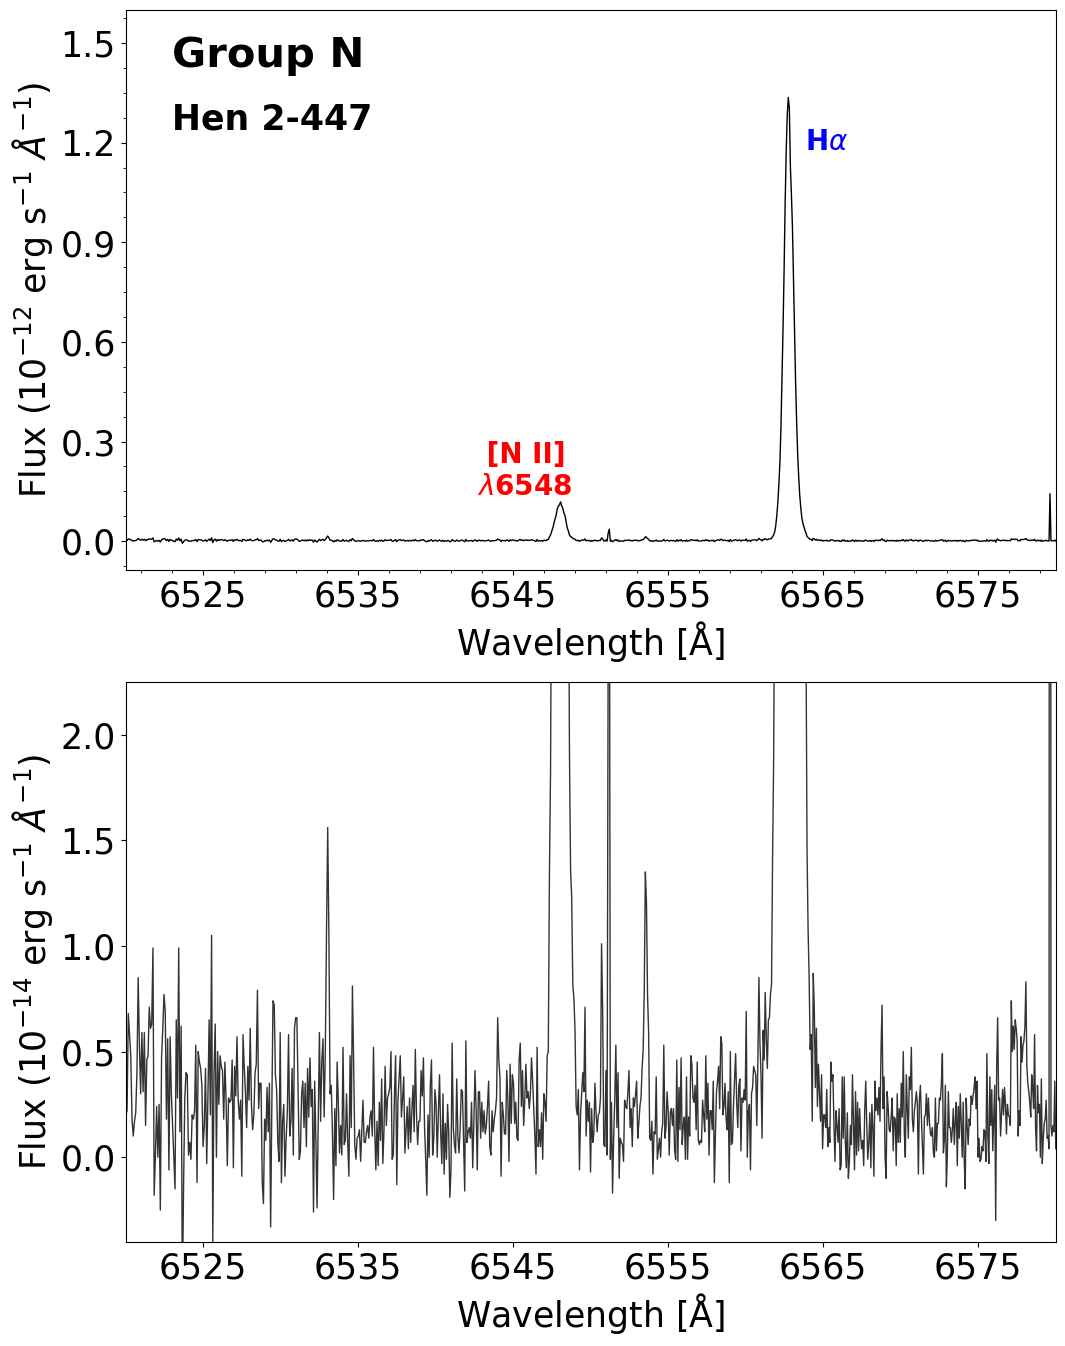

In [21]:
fig = plt.figure(1,figsize=(12,16))


plt.subplot(211)
name = 'Hen2_447'
globals()[f'Model_lam_{name}'] = globals()[f'paramter_{name}']['Wavelength']
globals()[f'Model_flux_{name}'] = globals()[f'paramter_{name}']['Flux']

globals()[f'F_c_{name}'] = globals()[f'paramter_{name}']['Continuum_Model']

globals()[f'F_6527_{name}'] = globals()[f'paramter_{name}']['HeII_6527_Model']+ globals()[f'F_c_{name}']
globals()[f'F_6545_{name}'] = globals()[f'paramter_{name}']['Raman_HeII_6545_Model']  +globals()[f'F_c_{name}']

globals()[f'F_6560_{name}'] = globals()[f'paramter_{name}']['He_6560_Model']+globals()[f'F_c_{name}']
globals()[f'F_6563_{name}'] = globals()[f'paramter_{name}']['Ha_6563_Model'] + globals()[f'F_c_{name}']
globals()[f'F_6548_1_{name}'] = globals()[f'paramter_{name}']['NII_6548_1_Model'] + globals()[f'F_c_{name}']
globals()[f'F_6548_2_{name}'] = globals()[f'paramter_{name}']['NII_6548_2_Model'] + globals()[f'F_c_{name}']
globals()[f'F_6584_1_{name}'] = globals()[f'paramter_{name}']['NII_6584_1_Model'] + globals()[f'F_c_{name}']
globals()[f'F_6584_2_{name}'] = globals()[f'paramter_{name}']['NII_6584_2_Model'] + globals()[f'F_c_{name}']

normal = 1
plt.plot(globals()[f'Model_lam_{name}'],globals()[f'Model_flux_{name}']/normal,'k-',alpha=1,lw=1)
x_p = np.argmax(globals()[f'F_6563_{name}'])
y_label = globals()[f'F_6563_{name}'].max()/normal
x_label = globals()[f'Model_lam_{name}'][x_p]
plt.text(x_label + 1,y_label*(0.95),r'H$\alpha$',size=20,fontweight='bold',color='b')

x_p = np.argmax(globals()[f'F_6548_1_{name}'])
y_label = globals()[f'F_6548_1_{name}'].max()/normal
x_label = globals()[f'Model_lam_{name}'][x_p]
plt.text(x_label-5,y_label*(3.5),' [N II]\n$\lambda$6548',size=20,fontweight='bold',color='r')

lam_0_6527= 6527.1
lam_0_6545 = 6544.7
del_lam = (lam_0_6545 - lam_0_6527 )
# plt.ylabel(fontsize=20)
plt.xlabel(r'Wavelength $[\rm \AA]$',fontsize=25)
plt.ylabel(r'Flux $(10^{-12}$ erg s$^{-1}$ $ \AA^{-1})$',fontsize=25)
x_min,x_max = 6520,6580
plt.xlim(x_min,x_max)
# plt.ylim(-1,globals()[f'F_6563_{name}'].max()*1.3)
plt.xticks(np.arange(6525,6585,10),fontsize=25)
plt.yticks([0.0,0.3,0.6,0.9,1.2,1.5],fontsize=25)
# plt.yticks([0.0,2.5,5.0,7.5,10.0,12.5,15.0],fontsize=25)
plt.minorticks_on()
plt.ylim(top=1.6)

plt.text(x_min+3,globals()[f'F_6563_{name}'].max()*1.15,'Group N',size=30,fontweight='bold')
plt.text(x_min+3,globals()[f'F_6563_{name}'].max()*1.0,'Hen 2-447',size=25,fontweight='bold')

plt.subplot(212)

factor = 100
globals()[f'Model_lam_{name}'] = globals()[f'paramter_{name}']['Wavelength']
globals()[f'Model_flux_{name}'] = globals()[f'paramter_{name}']['Flux']*factor

globals()[f'F_c_{name}'] = globals()[f'paramter_{name}']['Continuum_Model']*factor

globals()[f'F_6527_{name}'] = globals()[f'paramter_{name}']['HeII_6527_Model']*factor+ globals()[f'F_c_{name}']
globals()[f'F_6545_{name}'] = globals()[f'paramter_{name}']['Raman_HeII_6545_Model']*factor  +globals()[f'F_c_{name}']

globals()[f'F_6560_{name}'] = globals()[f'paramter_{name}']['He_6560_Model']*factor+globals()[f'F_c_{name}']
globals()[f'F_6563_{name}'] = globals()[f'paramter_{name}']['Ha_6563_Model']*factor+ globals()[f'F_c_{name}']
globals()[f'F_6548_1_{name}'] = globals()[f'paramter_{name}']['NII_6548_1_Model']*factor+ globals()[f'F_c_{name}']
globals()[f'F_6548_2_{name}'] = globals()[f'paramter_{name}']['NII_6548_2_Model']*factor + globals()[f'F_c_{name}']
globals()[f'F_6584_1_{name}'] = globals()[f'paramter_{name}']['NII_6584_1_Model']*factor+ globals()[f'F_c_{name}']
globals()[f'F_6584_2_{name}'] = globals()[f'paramter_{name}']['NII_6584_2_Model']*factor+ globals()[f'F_c_{name}']
plt.plot(globals()[f'Model_lam_{name}'],globals()[f'Model_flux_{name}']/normal,'k-',alpha=0.8,lw=1)

plt.xlim(x_min,x_max)



x_min,x_max = 6520,6580
plt.xlim(x_min,x_max)
plt.xticks(np.arange(6525,6585,10),fontsize=25)
y_max = globals()[f'F_6527_{name}'].max()/normal

plt.xlabel(r'Wavelength $[\rm \AA]$',fontsize=25)
plt.ylabel(r'Flux $(10^{-14}$ erg s$^{-1}$ $ \AA^{-1}$)',fontsize=25)
plt.ylim(-0.4,2.25)
plt.yticks([0.0,0.5,1.0,1.5,2.0],fontsize=25)


# plt.legend(fontsize=20)
plt.savefig(f'/mnt/c/Users/wlsdl/OneDrive/바탕 화면/Re_BOES_{name}_WO',bbox_inches='tight')